In [1]:
import pandas as pd
import sys

sys.path.append('../../')
from src.transform import load_json,transform_diff_avg,transform_diff_experiments
from src.plot_helpers import plot_experiment_range,plot_correlation_matrix,plot_boxplot

indoors_cols = load_json("../../json/locations.json")["wings_indoors"]

In [2]:
df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)
df_air_indoor = pd.read_csv('../../data/clean_data/airwings.csv',index_col=0,parse_dates=True)

df_air_indoor = df_air_indoor.loc[(df_air_indoor['sensor'] == 'air_wings_indoor') | (df_air_indoor['sensor'] == 'air_wings_indoor_ref'), indoors_cols]

df_air_indoor.rename(columns={'device_id': 'sensor'}, inplace=True)
df_air_indoor['sensor'] = 'AWI_indoor_' + df_air_indoor['sensor'].astype(str)

df_air_indoor

/tmp/ipykernel_2039807/3833256816.py:1: DtypeWarning: Columns (6,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)


co2  tvoc   co  pm_1.0  pm_2.5  pm_10  temperature  \
datetime                                                                     
2024-10-16 05:00:43  657.32   0.0  0.5    2.15    2.27   2.24        26.60   
2024-10-16 05:01:43  657.32   0.0  0.5    2.15    2.25   2.23        26.60   
2024-10-16 05:02:43  657.31   0.0  0.5    2.13    2.24   2.22        26.60   
2024-10-16 05:03:43  657.31   0.0  0.5    2.05    2.15   2.13        26.59   
2024-10-16 05:04:43  657.31   0.0  0.5    2.00    2.11   2.09        26.59   
...                     ...   ...  ...     ...     ...    ...          ...   
2024-10-31 11:17:59  400.00   0.0  0.5   40.06   42.36  42.36        20.34   
2024-10-31 11:18:58  400.00   0.0  0.5   24.93   26.44  26.53        27.02   
2024-10-31 11:19:58  400.00   0.0  0.5   24.89   26.39  26.47        27.02   
2024-10-31 11:20:59  400.00   0.0  0.5   24.69   26.19  26.28        27.02   
2024-10-31 11:21:59  400.00   0.0  0.5   24.57   26.02  26.07        27.03   

                     humidity  pressure            sensor  
datetime                                                   
2024-10-16 05:00:43      33.0   1010.26    AWI_indoor_2.0  
2024-10-16 05:01:43      33.0   1010.28    AWI_indoor_2.0  
2024-10-16 05:02:43      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:03:43      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:04:43      33.0   1010.31    AWI_indoor_2.0  
...                       ...       ...               ...  
2024-10-31 11:17:59      49.0   1010.60  AWI_indoor_316.0  
2024-10-31 11:18:58      40.0   1015.51  AWI_indoor_316.0  
2024-10-31 11:19:58      40.0   1015.49  AWI_indoor_316.0  
2024-10-31 11:20:59      40.0   1015.49  AWI_indoor_316.0  
2024-10-31 11:21:59      40.0   1015.49  AWI_indoor_316.0  

[297323 rows x 10 columns]

In [3]:
co2_full = pd.concat([df_air_indoor[["co2","sensor"]],df[["co2","sensor"]]],axis=0)
co2_full.index.name = 'datetime'
co2_full


co2          sensor
datetime                                    
2024-10-16 05:00:43   657.32  AWI_indoor_2.0
2024-10-16 05:01:43   657.32  AWI_indoor_2.0
2024-10-16 05:02:43   657.31  AWI_indoor_2.0
2024-10-16 05:03:43   657.31  AWI_indoor_2.0
2024-10-16 05:04:43   657.31  AWI_indoor_2.0
...                      ...             ...
2024-11-05 16:17:00   996.77      ref_sensor
2024-11-05 16:18:00  1025.73      ref_sensor
2024-11-05 16:19:00  1034.32      ref_sensor
2024-11-05 16:20:00  1011.70      ref_sensor
2024-11-05 16:21:00  1005.20      ref_sensor

[1262099 rows x 2 columns]

In [4]:
pivot_full = pd.DataFrame()

for col in co2_full["sensor"].unique():
    
    pivot_full = pd.concat([pivot_full,co2_full.loc[co2_full['sensor'] == col].pivot_table(index='datetime', columns='sensor', values='co2')],axis=1)

pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17']

sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 05:04:00        657.2975      593.952500        548.0125   
2024-10-16 05:08:00        657.2900      594.003333        548.1150   
2024-10-16 05:12:00        657.2000      594.004167        547.9875   
2024-10-16 05:16:00        657.1150      593.848333        546.7600   
2024-10-16 05:20:00        657.1100      593.846667        546.8575   
...                             ...             ...             ...   
2024-10-20 23:40:00        630.1100      619.031818        838.5200   
2024-10-20 23:44:00        630.1200      619.218333        839.3700   
2024-10-20 23:48:00        630.0675      619.310833        839.9575   
2024-10-20 23:52:00        630.0550      619.330000        837.4575   
2024-10-20 23:56:00        630.1925      619.307500        829.4100   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 05:04:00        571.3525        565.5725        590.1250   
2024-10-16 05:08:00        570.5650        565.2925        589.9875   
2024-10-16 05:12:00        568.5600        563.8175        590.1825   
2024-10-16 05:16:00        565.9100        563.5600        590.4100   
2024-10-16 05:20:00        566.0700        563.3300        590.4475   
...                             ...             ...             ...   
2024-10-20 23:40:00        831.8650        782.7275        590.5450   
2024-10-20 23:44:00        830.0725        783.2125        591.6000   
2024-10-20 23:48:00        830.5675        783.6100        591.7275   
2024-10-20 23:52:00        831.7975        784.4025        592.1750   
2024-10-20 23:56:00        832.4925        785.4500        592.6425   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 05:04:00        576.6100        542.0650         532.0300   
2024-10-16 05:08:00        575.4825        541.2025         531.2600   
2024-10-16 05:12:00        575.0750        540.2600         529.4900   
2024-10-16 05:16:00        575.4075        539.9800         527.1875   
2024-10-16 05:20:00        575.2825        540.7525         528.1175   
...                             ...             ...              ...   
2024-10-20 23:40:00        940.9425        878.8325         971.3700   
2024-10-20 23:44:00        942.5925        879.5975         971.2050   
2024-10-20 23:48:00        942.8350        879.6650         971.3575   
2024-10-20 23:52:00        946.0225        879.8300         972.8750   
2024-10-20 23:56:00        945.4875        881.0875         974.3475   

sensor               AWI_indoor_11.0  ...  AWI_indoor_13.0  AWI_indoor_14.0  \
datetime                              ...                                     
2024-10-16 05:04:00         562.7050  ...         558.0750         567.5125   
2024-10-16 05:08:00         562.1375  ...         558.0250         566.5750   
2024-10-16 05:12:00         561.7950  ...         557.9800         565.8225   
2024-10-16 05:16:00         561.1300  ...         557.8900         566.1225   
2024-10-16 05:20:00         559.7800  ...         557.9700         566.2900   
...                              ...  ...              ...              ...   
2024-10-20 23:40:00         785.2325  ...         877.1550         792.1825   
2024-10-20 23:44:00         786.5325  ...         877.7575         795.1200   
2024-10-20 23:48:00         785.6525  ...         878.9450         796.8400   
2024-10-20 23:52:00         788.2550  ...         879.6950         797.5925   
2024-10-20 23:56:00         789.8675  ...         880.3725         798.9200   

sensor               AWI_indoor_15.0  AWI_indoor_316.0  inbiot  kaiterra  \
datetime                                                                   
2024-10-16 05:04:00         546.680

## Correlation matrix

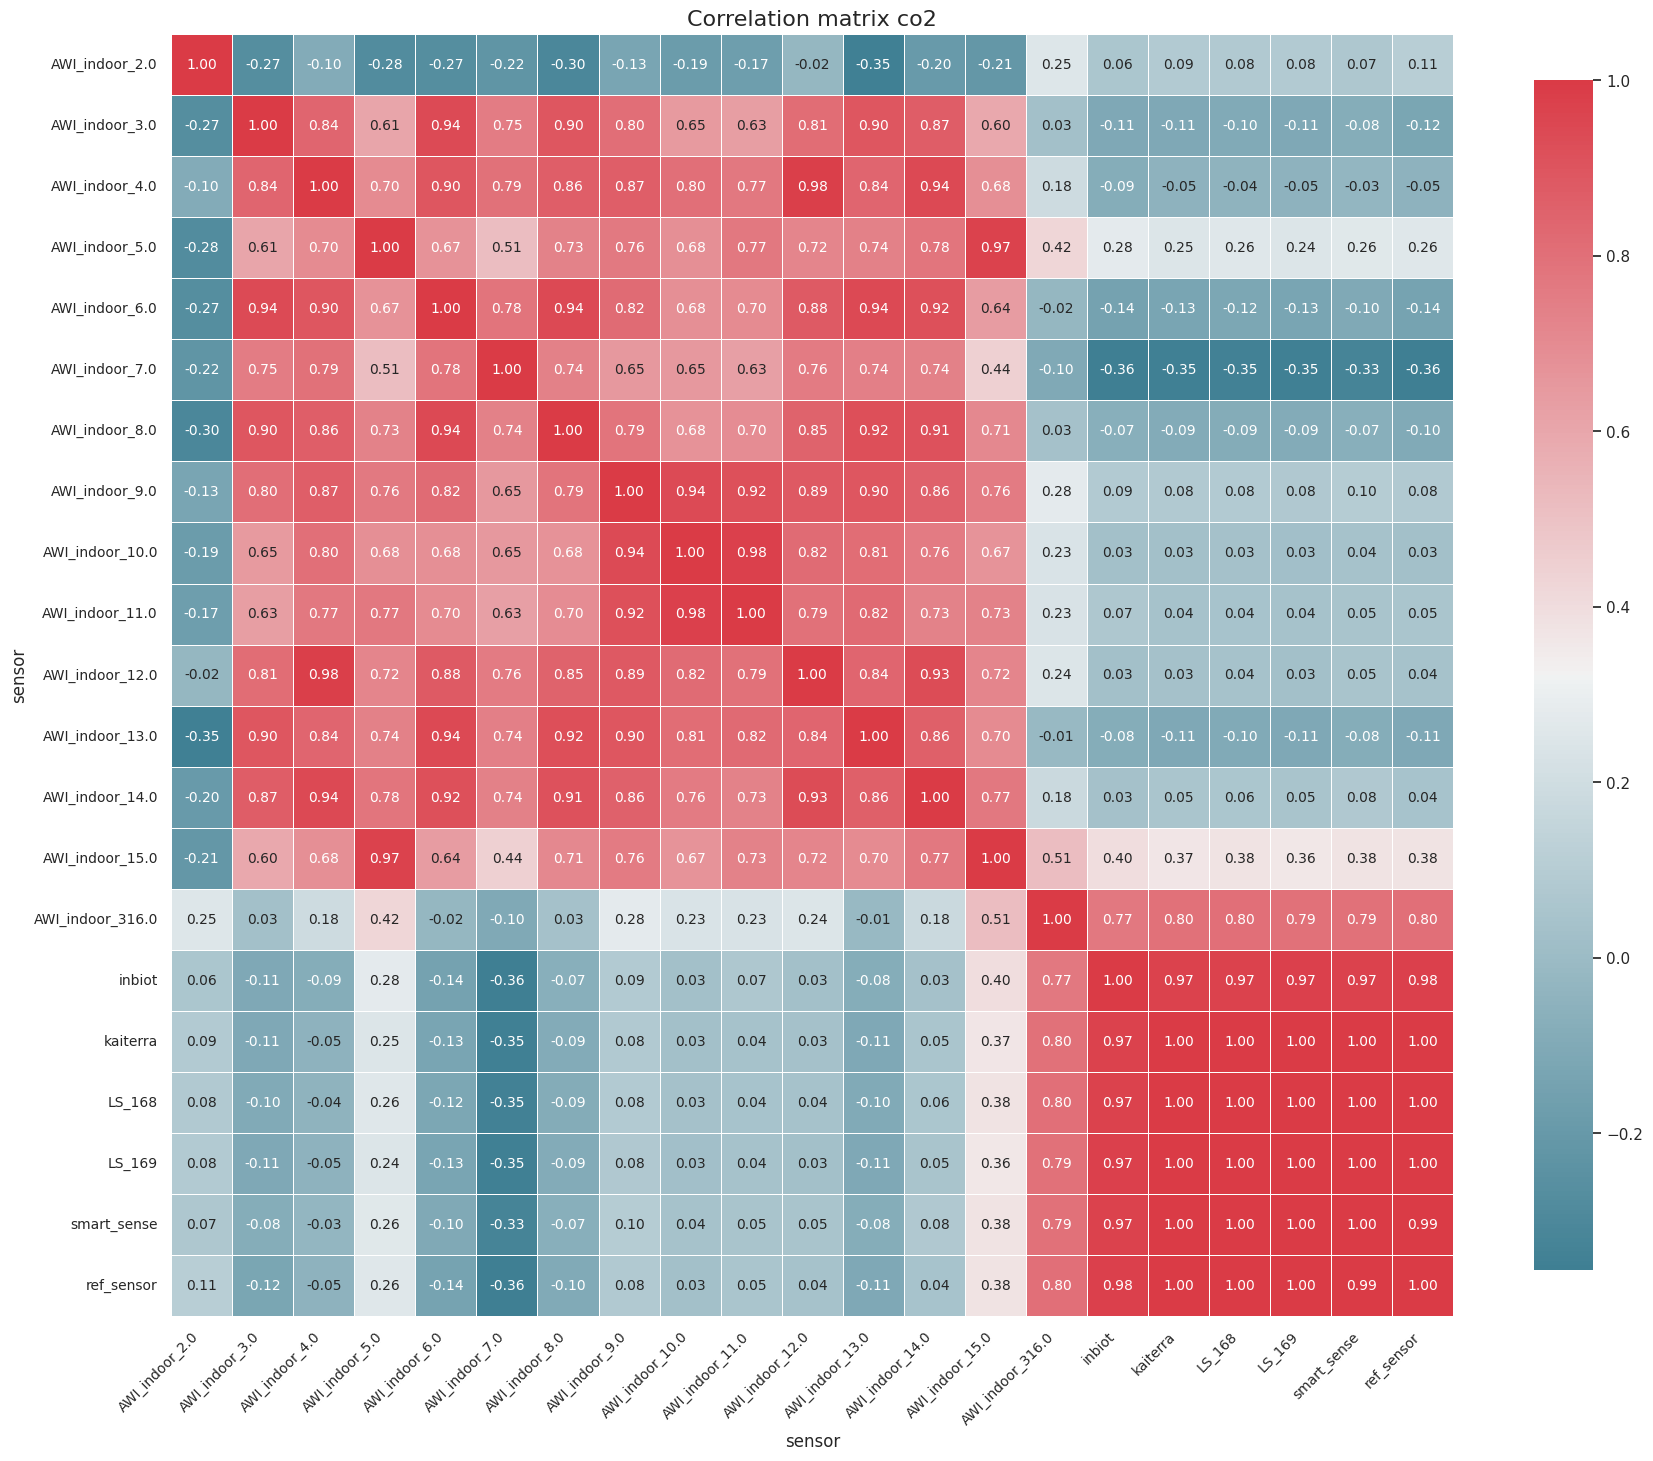

In [5]:
plot_correlation_matrix(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'].corr(),"Correlation matrix co2")

## Box plots

In [6]:
plot_boxplot(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'],col_names=['AWI_indoor_2.0','AWI_indoor_15.0','AWI_indoor_316.0','LS_168','LS_169','ref_sensor','kaiterra','inbiot'])

## Time series plot

In [7]:
plot_experiment_range(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-11-02 23:56:17'],col_names=['AWI_indoor_316.0','LS_168','LS_169','ref_sensor','kaiterra','inbiot'])

In [8]:
diff_df = transform_diff_avg(pivot_full.resample('240s').mean())
diff_df

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:16: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Doors opened  Hall opened  Indoor Room Air Exchange  \
sensor                                                                  
AWI_indoor_2.0        0.274530    -0.003310                  0.001516   
AWI_indoor_3.0       -0.010220    -0.034582                 -0.001866   
AWI_indoor_4.0       -0.133437    -1.487143                 -0.023507   
AWI_indoor_5.0        0.864584    -1.134619                 -3.749161   
AWI_indoor_6.0       -0.266286    -1.471116                  0.041414   
AWI_indoor_7.0        0.195870    -1.041731                  0.005510   
AWI_indoor_8.0       -0.117435    -1.185211                 -0.823720   
AWI_indoor_9.0       -0.154970    -1.407947                  0.100424   
AWI_indoor_10.0      -0.226477    -1.841151                 -0.048424   
AWI_indoor_11.0      -0.510788    -1.698989                 -0.056847   
AWI_indoor_12.0      -0.431937    -2.085396                  0.041310   
AWI_indoor_13.0      -0.305022    -1.953968                  0.003930   
AWI_indoor_14.0       0.484639    -0.974073                  0.021477   
AWI_indoor_15.0       0.513616    -2.108764                 -5.133873   
AWI_indoor_316.0     -8.885338    -2.873049                 -9.692007   
inbiot               -8.749512    -3.058875                 -8.198081   
kaiterra             -9.273622    -3.211186                 -8.688064   
LS_168              -10.804702    -3.822122                -10.317280   
LS_169              -11.073625    -3.793868                -10.563112   
smart_sense          -8.502649    -2.781955                 -7.951480   
ref_sensor           -8.835730    -3.178037                 -8.346057   

                  Rowing CD  Rowing OD  Human Presence  Diffuser (Water)  \
sensor                                                                     
AWI_indoor_2.0    -0.016789  -0.005637        0.000217          0.000298   
AWI_indoor_3.0     0.008516   0.001852       -0.008144          0.079229   
AWI_indoor_4.0    -0.034912  -4.935540       -0.101833          0.993416   
AWI_indoor_5.0    -0.109733  -5.061307       -0.282950          1.650171   
AWI_indoor_6.0     0.000000  -2.893399       -0.290823          0.809123   
AWI_indoor_7.0     0.023332  -1.573923       -0.093578          0.461569   
AWI_indoor_8.0     0.003764  -3.216974       -0.047888          1.005129   
AWI_indoor_9.0    -0.058838  -5.609982       -0.313020          0.694806   
AWI_indoor_10.0   -0.042446  -6.855015       -0.336607          0.784372   
AWI_indoor_11.0    0.033654  -3.354401       -0.181612          0.557503   
AWI_indoor_12.0   -0.033133  -7.060349       -0.228770          1.678771   
AWI_indoor_13.0   -0.034771  -3.347157        0.013923          0.729029   
AWI_indoor_14.0    0.000000  -3.472971       -0.151346          0.449066   
AWI_indoor_15.0   -0.108336  -7.613269       -0.320690          2.122961   
AWI_indoor_316.0  -0.086189  -0.156715       -0.833904          3.500242   
inbiot             1.414677 -14.661394        0.032726          1.388583   
kaiterra           5.236977 -19.580112       -1.098206          1.223465   
LS_168             5.009736 -20.535154       -0.913874          1.109047   
LS_169             5.132014 -21.249595       -0.950830          1.966771   
smart_sense        4.984350 -17.910697       -0.982519          1.137099   
ref_sensor         5.244743 -19.509617       -0.976610          1.278515   

                  Diffuser (Oil)  Car (3m)   Car (5m)  ...    Heater  \
sensor                                                 ...             
AWI_indoor_2.0         -0.000595 -0.002382   0.001191  ... -0.036804   
AWI_indoor_3.0          0.181553 -0.032609  -0.020518  ...  0.011670   
AWI_indoor_4.0          0.656803 -1.703057  -1.540718  ...  0.076599   
AWI_indoor_5.0          3.135708 -3.533339  -2.217512  ...  0.081138   
AWI_indoor_6.0          2.565177 -3.539341  -1.681648  ...  0.087391   
AWI_indoor_7.0          1.173959 -4.404695  -2.058637  ...  0.038965   
AWI_indoor_8.

### Correlation matrix for diff DataFrame

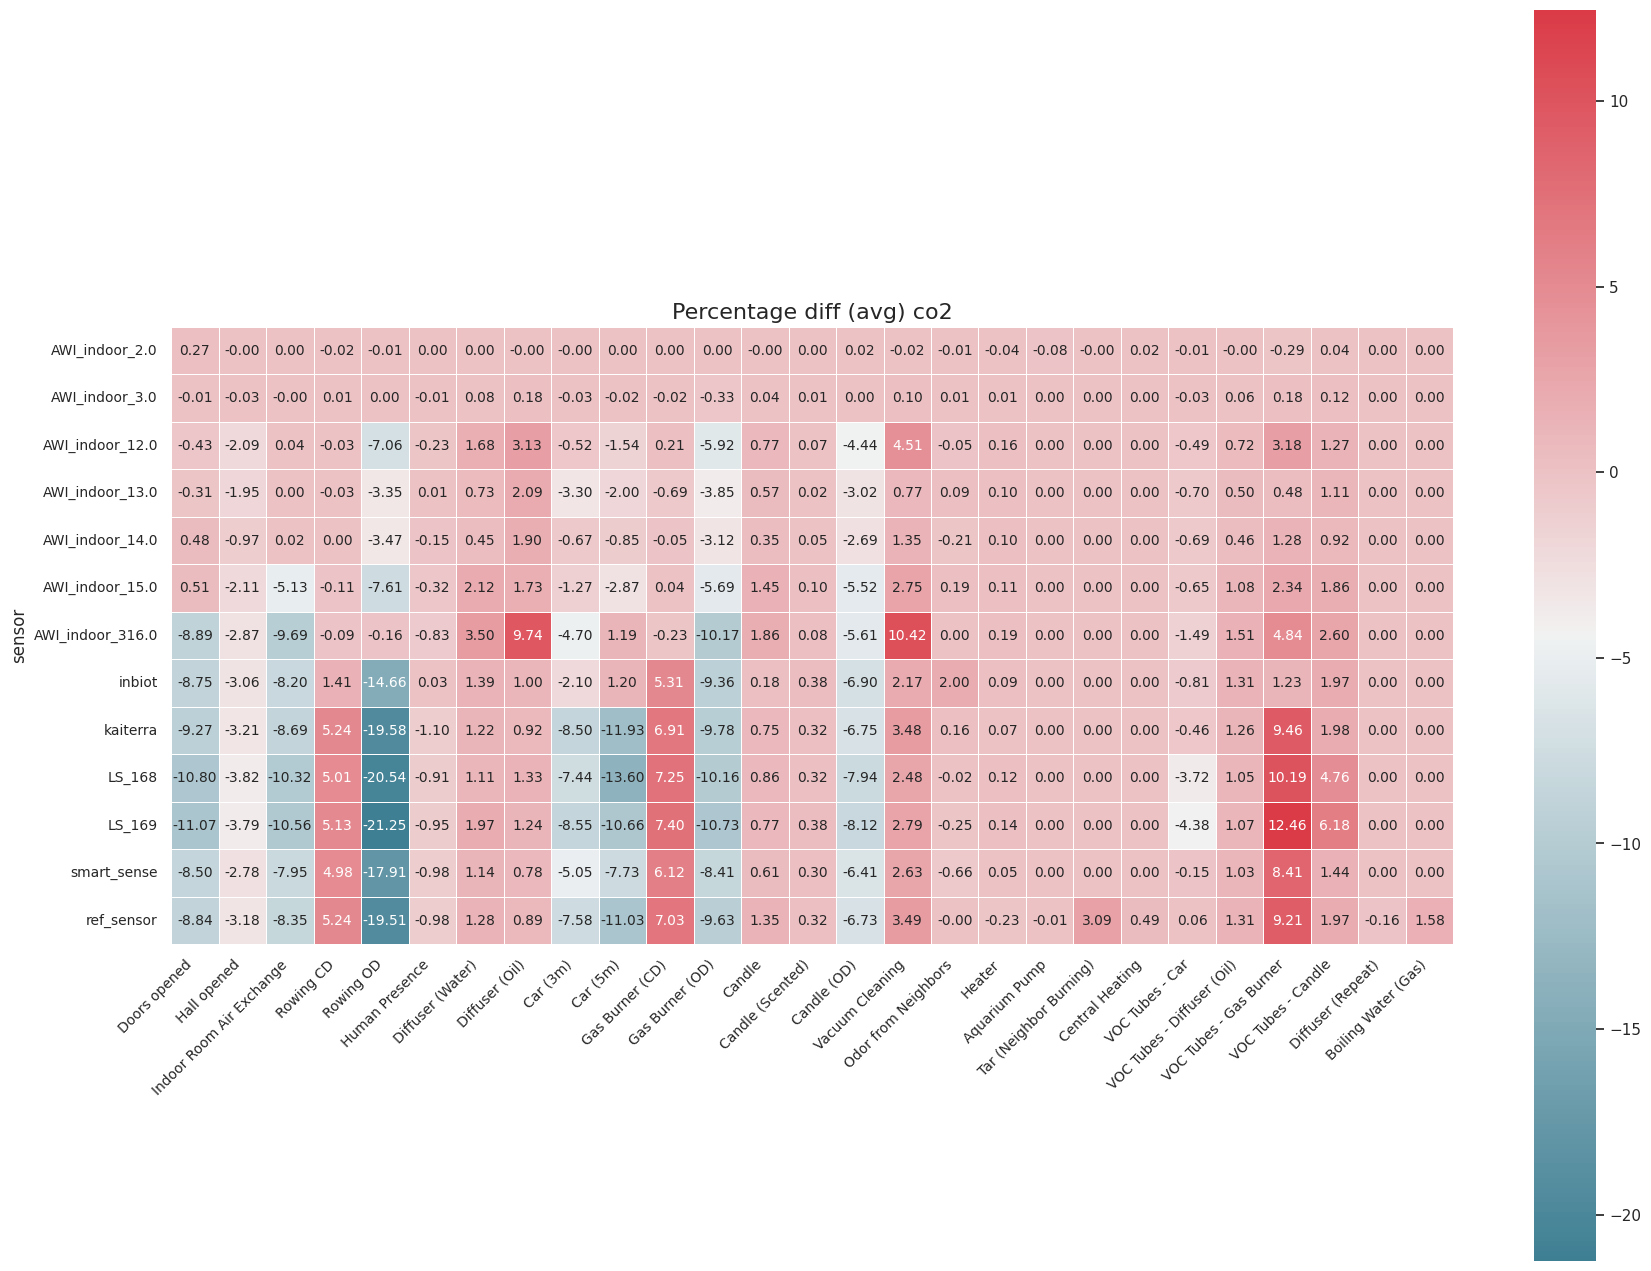

In [9]:
plot_correlation_matrix(diff_df.drop(['AWI_indoor_4.0','AWI_indoor_5.0','AWI_indoor_6.0','AWI_indoor_7.0','AWI_indoor_8.0','AWI_indoor_9.0','AWI_indoor_10.0','AWI_indoor_11.0']),title="Percentage diff (avg) co2")

###

In [12]:
df_diff_exp_data = transform_diff_experiments(pivot_full.resample('240s').mean())
df_diff_exp_data

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:37: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 09:16:00        0.192879       -0.010824       -0.628202   
2024-10-16 09:20:00        0.220571       -0.040721       -0.904992   
2024-10-16 09:24:00        0.283185       -0.033523        0.126394   
2024-10-16 09:28:00        0.086421        0.004150        0.143219   
2024-10-16 09:32:00        0.079151       -0.001263        0.000000   
...                             ...             ...             ...   
2024-11-02 19:28:00        0.001587        0.000000        0.000000   
2024-11-02 19:32:00        0.001984        0.000000        0.000000   
2024-11-02 19:36:00       -0.014282        0.000000        0.000000   
2024-11-02 19:40:00        0.009523        0.000000        0.000000   
2024-11-02 19:44:00        0.013886        0.000000        0.000000   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 09:16:00        0.000000       -0.871898       -0.260342   
2024-10-16 09:20:00       -0.637575       -1.403055       -0.989513   
2024-10-16 09:24:00       -1.162363       -0.040427       -0.339258   
2024-10-16 09:28:00        0.467397        0.097513        0.049447   
2024-10-16 09:32:00        0.000000        0.122558        0.064135   
...                             ...             ...             ...   
2024-11-02 19:28:00        0.000000        0.000000        0.000000   
2024-11-02 19:32:00        0.000000        0.000000        0.000000   
2024-11-02 19:36:00        0.000000        0.000000        0.000000   
2024-11-02 19:40:00        0.000000        0.000000        0.000000   
2024-11-02 19:44:00        0.000000        0.000000        0.000000   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 09:16:00        0.000000       -0.841391        -1.505265   
2024-10-16 09:20:00       -0.474501       -1.628970        -2.313107   
2024-10-16 09:24:00       -0.852912       -0.045102        -0.306822   
2024-10-16 09:28:00        0.006415        0.300191         0.000000   
2024-10-16 09:32:00        0.180786        0.434880         0.700085   
...                             ...             ...              ...   
2024-11-02 19:28:00        0.000000        0.000000         0.000000   
2024-11-02 19:32:00        0.000000        0.000000         0.000000   
2024-11-02 19:36:00        0.000000        0.000000         0.000000   
2024-11-02 19:40:00        0.000000        0.000000         0.000000   
2024-11-02 19:44:00        0.000000        0.000000         0.000000   

sensor               AWI_indoor_11.0  ...  AWI_indoor_13.0  AWI_indoor_14.0  \
datetime                              ...                                     
2024-10-16 09:16:00        -1.107880  ...        -0.463957         0.000000   
2024-10-16 09:20:00        -2.473952  ...        -1.319286        -0.472014   
2024-10-16 09:24:00        -1.101577  ...        -1.014442        -1.061822   
2024-10-16 09:28:00         0.240733  ...        -0.053867        -0.294934   
2024-10-16 09:32:00         0.148573  ...         0.251209         0.507098   
...                              ...  ...              ...              ...   
2024-11-02 19:28:00         0.000000  ...         0.000000         0.000000   
2024-11-02 19:32:00         0.000000  ...         0.000000         0.000000   
2024-11-02 19:36:00         0.000000  ...         0.000000         0.000000   
2024-11-02 19:40:00         0.000000  ...         0.000000         0.000000   
2024-11-02 19:44:00         0.000000  ...         0.000000         0.000000   

sensor               AWI_indoor_15.0  AWI_indoor_316.0     inbiot   kaiterra  \
datetime                                                                       
2024-10-16 09:16:00        

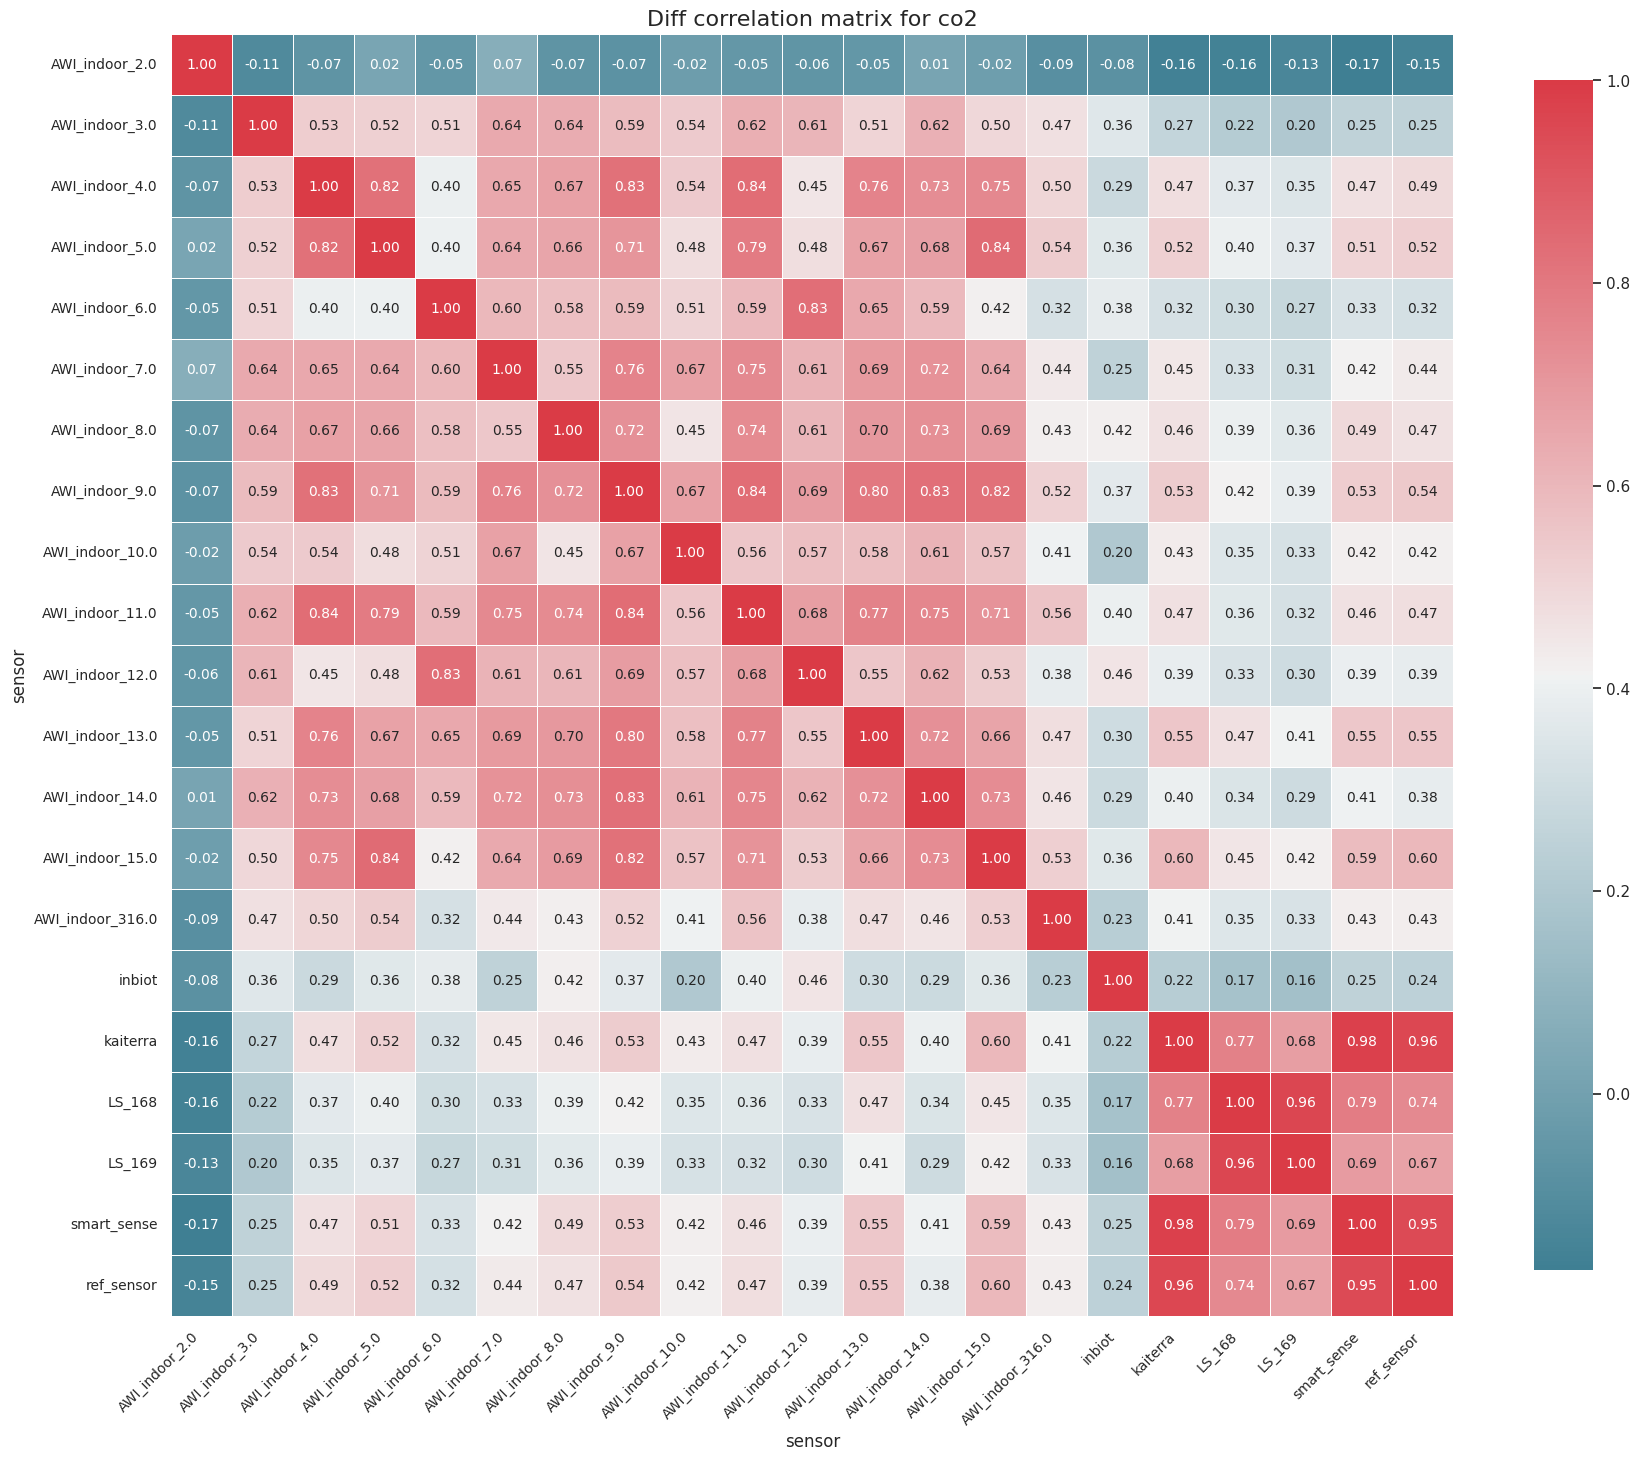

In [13]:
plot_correlation_matrix(df_diff_exp_data.corr(),title="Diff correlation matrix for co2")